# Data Understanding

The [Kitchenware Classification](https://www.kaggle.com/competitions/kitchenware-classification) dataset has 9.367 images of kitchenware items. 60% of the images (5.560) are labeled.
The aim is to use image recognition to categorize unlabeld images of kitchenware items.

In [1]:
import pandas as pd

from src.kitchenware_helper import plot_thumbnails_for_label

In [2]:
# load labels
df_train = pd.read_csv('data/train.csv', dtype={'Id': str})
df_train['filename'] = 'data/images/' + df_train['Id'] + '.jpg'
df_train.head()

Id  label              filename
0  0560  glass  data/images/0560.jpg
1  4675    cup  data/images/4675.jpg
2  0875  glass  data/images/0875.jpg
3  4436  spoon  data/images/4436.jpg
4  8265  plate  data/images/8265.jpg

## Classes

The dataset consists of images, which are divided into six classes (number / frequency).
* plate   (1.227 / 22%)
* cup     (1.135 / 20%)
* spoon     (989 / 18%)
* knife     (909 / 16%)
* glass     (742 / 13%)
* fork      (557 / 10%)

The classes are imbalanced. The largest class of images (plates) is more the twices as large as the smallest class (forks).  
It might be advised to watch the generalizability (validation accuracy) for each of the classes closely. If smaller classes are more error prone, resampling or image augmentation might help.

In [3]:
df_train['label'].value_counts()

plate    1227
cup      1135
spoon     989
knife     909
glass     742
fork      557
Name: label, dtype: int64

### Class: Plate
1.227 images (22% of dataset)

Most of the first thirty plates in the dataset (preview below) were photographed top down. The majority appears to be round. Some plates are rectagular shaped.

Thoughts on augmentation:
* Flipping along the horizontal and vertical axis will not distort the perspective.
* Image rotation might be suitable as well, because most of the pictures in a top down perspective, but might have negative side-effects on pictures in other perspectives.

In [4]:
plot_thumbnails_for_label(df_train, label='plate')

### Class: Cup
1.135 images (20% of dataset)

Most of the first thirty cups in the dataset (preview below) were photographed in profile or slightly downwards. Most of them are aligned upright. 

Thoughts on augmentation:
* Flipping on vertical axis will not distort the perspective.
* Flipping on horizontal axis will turn cups upside down, which might not help for the training.
* Image rotation might improve generalizability, but probably not for this dataset, because most of the cups are aligned upright.

In [5]:
plot_thumbnails_for_label(df_train, label='cup')

### Class: Glass
742 images (13% of dataset)

Most of the first thirty drinking glasses in the dataset (preview below) were photographed in profile or slightly downwards. Most of them are aligned upright. 
It appears from the preview, that the class "glass" also consists of drinking vessels made from other materials like plastic, metal and ceramic. 
The differentiation from the class "cup" (above) might be the absence of a handle, but some of the objects in the category cup above are also without handle. Confusion between cups and glasses in the prediction results are expected.

Thoughts on augmentation:
* Flipping on vertical axis will not distort the perspective.
* Flipping on horizontal axis will turn cups upside down, which might not help for the training.
* Image rotation might improve generalizability, but probably not for this dataset, because most of the cups are aligned upright.

In [6]:
plot_thumbnails_for_label(df_train, label='glass')

### Class: Spoon
989 images (18% of dataset)

Most of the first thirty spoons in the dataset (preview below) were photographed top down. The bowls of the spoons mostly points upwards or to the left. Some spoons are oriented in other angles.

Thoughts on augmentation:
* Flipping on horizontal or vertical axis will change the direction of the spoon, except for spoons that are aligned on the flipping axis.
* Image rotation might improve generalizability, because it could help better recognizing spoons in the different orientations.

In [7]:
plot_thumbnails_for_label(df_train, label='spoon')

### Class: Knife
909 images (16% of dataset)

Most of the first thirty knifes in the dataset (preview below) were photographed top down. The tip of the knife mostly points upwards, while the cutting edge either points to the right or left. Other positions are also prevalent.

Thoughts on augmentation:
* Flipping on horizontal or vertical axis will change the direction of the knife. For knifes that are aligned on the flipping axis, the position of the cutting edge will change.
* Image rotation might improve generalizability, because it could help better recognizing knifes in the different orientations.

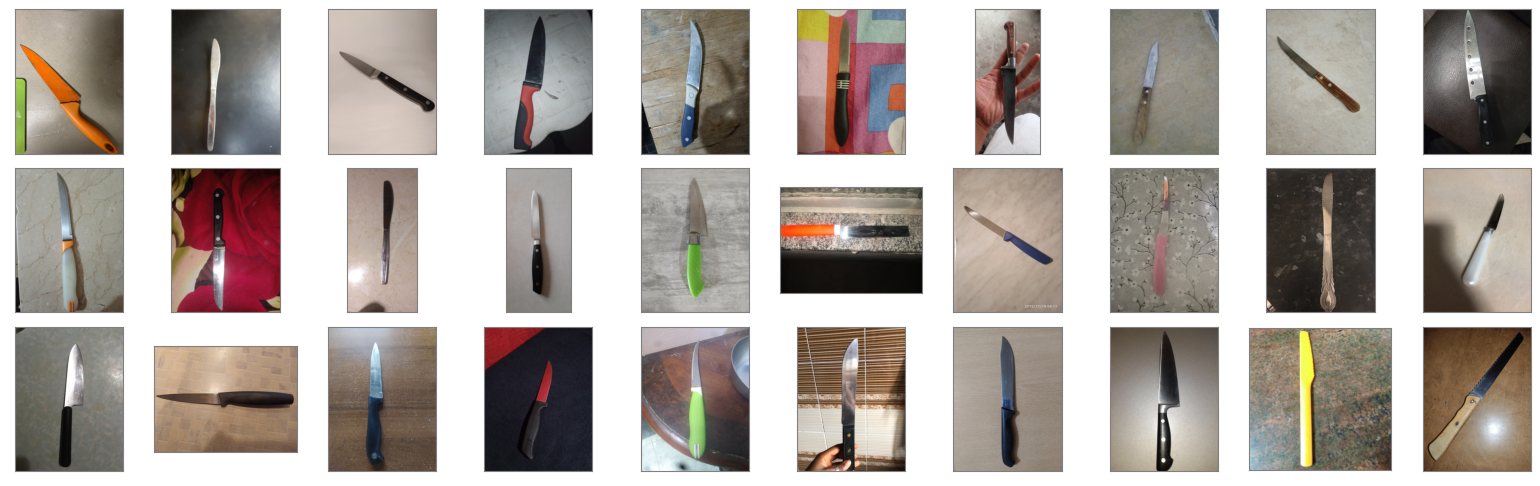

In [8]:
plot_thumbnails_for_label(df_train, label='knife')

### Class: Fork
557 images (10% of dataset)

Most of the first thirty forks in the dataset (preview below) were photographed top down. The prongs of the fork mostly points upwards. Other positions are also prevalent.

Thoughts on augmentation:
* Flipping on horizontal or vertical axis will change the direction of the fork, except for forks that are aligned on the flipping axis.
* Image rotation might improve generalizability, because it could help better recognizing forks in the different orientations.

In [9]:
plot_thumbnails_for_label(df_train, label='fork')

## Data Augmentation

Data augmentation creates variantions of an image, by flipping, rotating, zooming or other methods of image modification. It is a strategy of upsampling the dataset and lets the model train on a higher variation of images. 

After looking at the six classes these are potential augmentation options:

| class     | count     | flip horizontally | flip vertically | rotate      |
|-----------|-----------|-------------------|-----------------|-------------|
| plate     |     1.227 | ✅                 | ✅               | ✅           |
| cup       |     1.135 | ❌                 | ✅               | ❌           |
| glass     |       742 | ❌                 | ✅               | ❌           |
| spoon     |       989 | ✅                 | ✅               | ✅           |
| knife     |       909 | ✅                 | ✅               | ✅           |
| fork      |       557 | ✅                 | ✅               | ✅           |
| **total** | **5.560** | **∑ ✅ 3.682**       | **∑ ✅ 5.560**     | **∑ ✅ 4.910** |

The majority of the classes will profit from the mentioned augmentations.

Other augementation options are:
* Zooming: The images appear to be cropped around the objects already. Zooming in could cut off parts of the object and might reduce prediction quality.
* Shearing: Warps the object, that it appears to be seen from different perspective. The perspectives on objects in a class are mostly the same, shearing could be evaluated later on.
* Brightness: Changing brightness of the image could simulate different camera exposure settings. The level of light in the images varies, therefore augmenting the brightness might improve model generalizability.

From the other options brightness will be evaluated as well.